In [77]:
#B Data Cleaning and Preprocessing
#Feature Engineering done separately

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


C:\Users\shkmu\AppData\Local\Temp\ipykernel_20428\2434213950.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\shkmu\AppData\Local\Temp\ipykernel_20428\2434213950.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

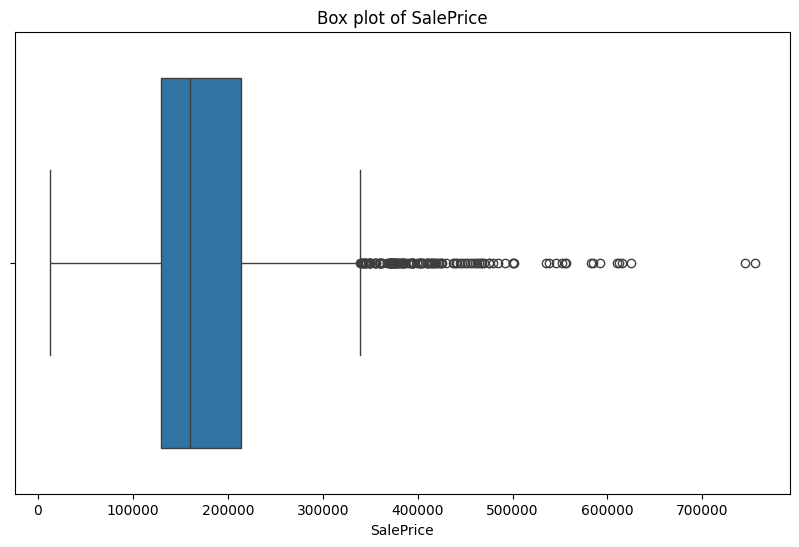

Data preprocessing completed.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"W:\5th semester\ids proj\Data.csv")

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


import matplotlib.pyplot as plt
import seaborn as sns


# Fill missing numerical values with mean
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)

# Fill missing categorical values with mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

# Box plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Box plot of SalePrice')
plt.show()

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in SalePrice
ames_data = remove_outliers(df, 'SalePrice')

print("Data preprocessing completed.")


In [79]:
#C Exploratory Data Analysis (EDA)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Ames Housing dataset
df = pd.read_csv(r"W:\5th semester\ids proj\data_engineered.csv")

In [81]:
# Calculate mean, median, and mode for 'SalePrice'
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
mode_price = df['SalePrice'].mode().values[0]

print('Mean Price:', mean_price)
print('Median Price:', median_price)
print('Mode Price:', mode_price)


Mean Price: 178854.12342376768
Median Price: 163000.0
Mode Price: 135000.0


In [82]:
# Calculate variance, standard deviation, and range for 'SalePrice'
variance_price = df['SalePrice'].var()
std_dev_price = df['SalePrice'].std()
price_range = df['SalePrice'].max() - df['SalePrice'].min()

print('Variance Price:', variance_price)
print('Standard Deviation Price:', std_dev_price)
print('Price Range:', price_range)


Variance Price: 4526950467.4415655
Standard Deviation Price: 67282.61638374036
Price Range: 384005.0


In [83]:
# Compute correlation matrix for selected columns
correlation_matrix = df[['SalePrice', 'OverallQual', 'GrLivArea']].corr()

print('Correlation Matrix:')
print(correlation_matrix)


Correlation Matrix:
             SalePrice  OverallQual  GrLivArea
SalePrice     1.000000     0.809209   0.706604
OverallQual   0.809209     1.000000   0.538991
GrLivArea     0.706604     0.538991   1.000000


In [84]:
# Group by 'Location' and calculate mean Sale Price for each location
location_mean_price = df.groupby('Location')['SalePrice'].mean()

print('Mean Sale Price by Location:')
print(location_mean_price)


Mean Sale Price by Location:
Location
1    138194.593804
2    151184.290891
3    198714.606299
4    261270.218935
Name: SalePrice, dtype: float64


In [85]:
# Describe the dataset to get overall statistics
data_description = df.describe()

print('Data Description:')
print(data_description)


Data Description:
           SalePrice  LnSalePrice          Age    GrLivArea  BaseLivArea  \
count    2617.000000  2617.000000  2617.000000  2617.000000  2617.000000   
mean   178854.123424    12.028019    35.391288  1477.056935   478.006114   
std     67282.616384     0.363746    29.792384   448.549697   440.988619   
min     35000.000000    10.463103     0.000000   334.000000     0.000000   
25%    131000.000000    11.782953     7.000000  1131.000000     0.000000   
50%    163000.000000    12.001505    33.000000  1442.000000   457.000000   
75%    213500.000000    12.271392    53.000000  1726.000000   791.000000   
max    419005.000000    12.945638   136.000000  3005.000000  1880.000000   

          Location   Amenities     RoadRail  BedroomAbvGr    Bathrooms  ...  \
count  2617.000000  2617.00000  2617.000000   2617.000000  2617.000000  ...   
mean      2.359572     0.01987     0.060757      2.842568     1.757738  ...   
std       1.030617     0.13958     0.238929      0.807822   

In [86]:
#Data Visualization

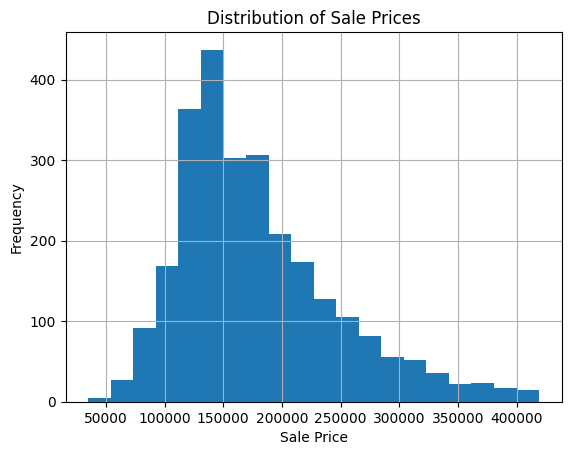

In [87]:

#Histogram of 'SalePrice'
df['SalePrice'].hist(bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()


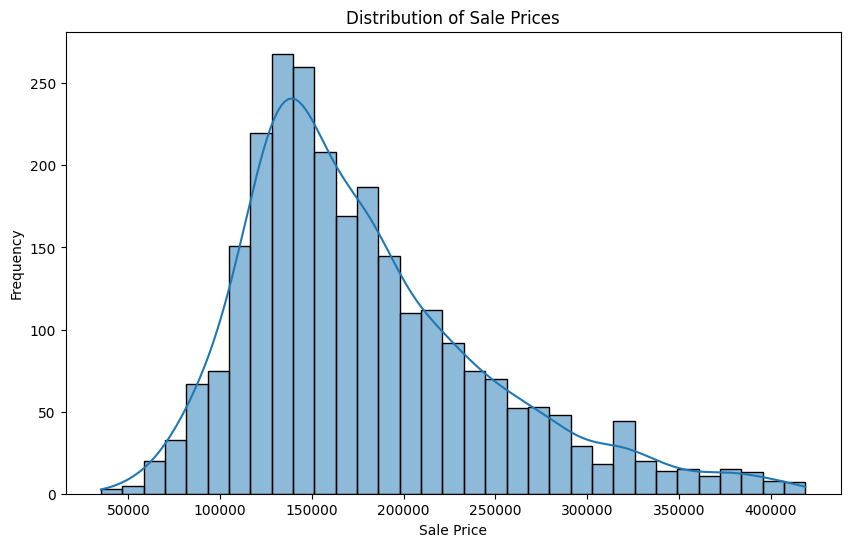

In [88]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()


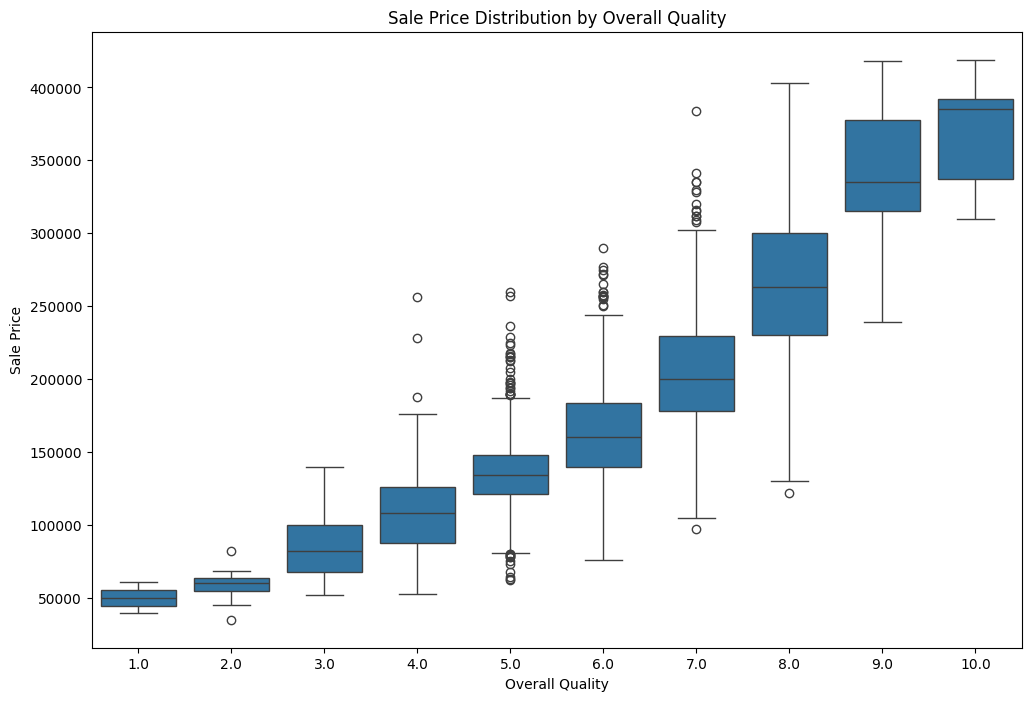

In [89]:
#Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Sale Price Distribution by Overall Quality')
plt.show()


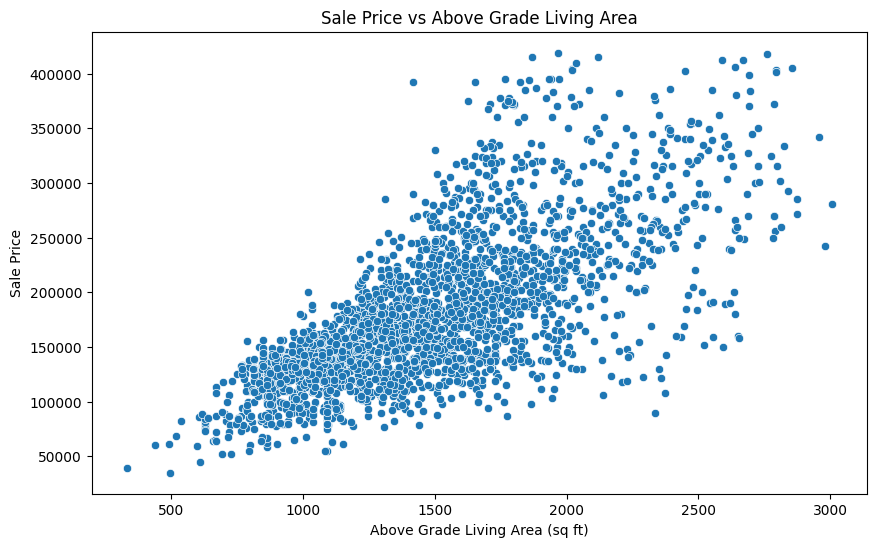

In [90]:
#Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Above Grade Living Area')
plt.show()


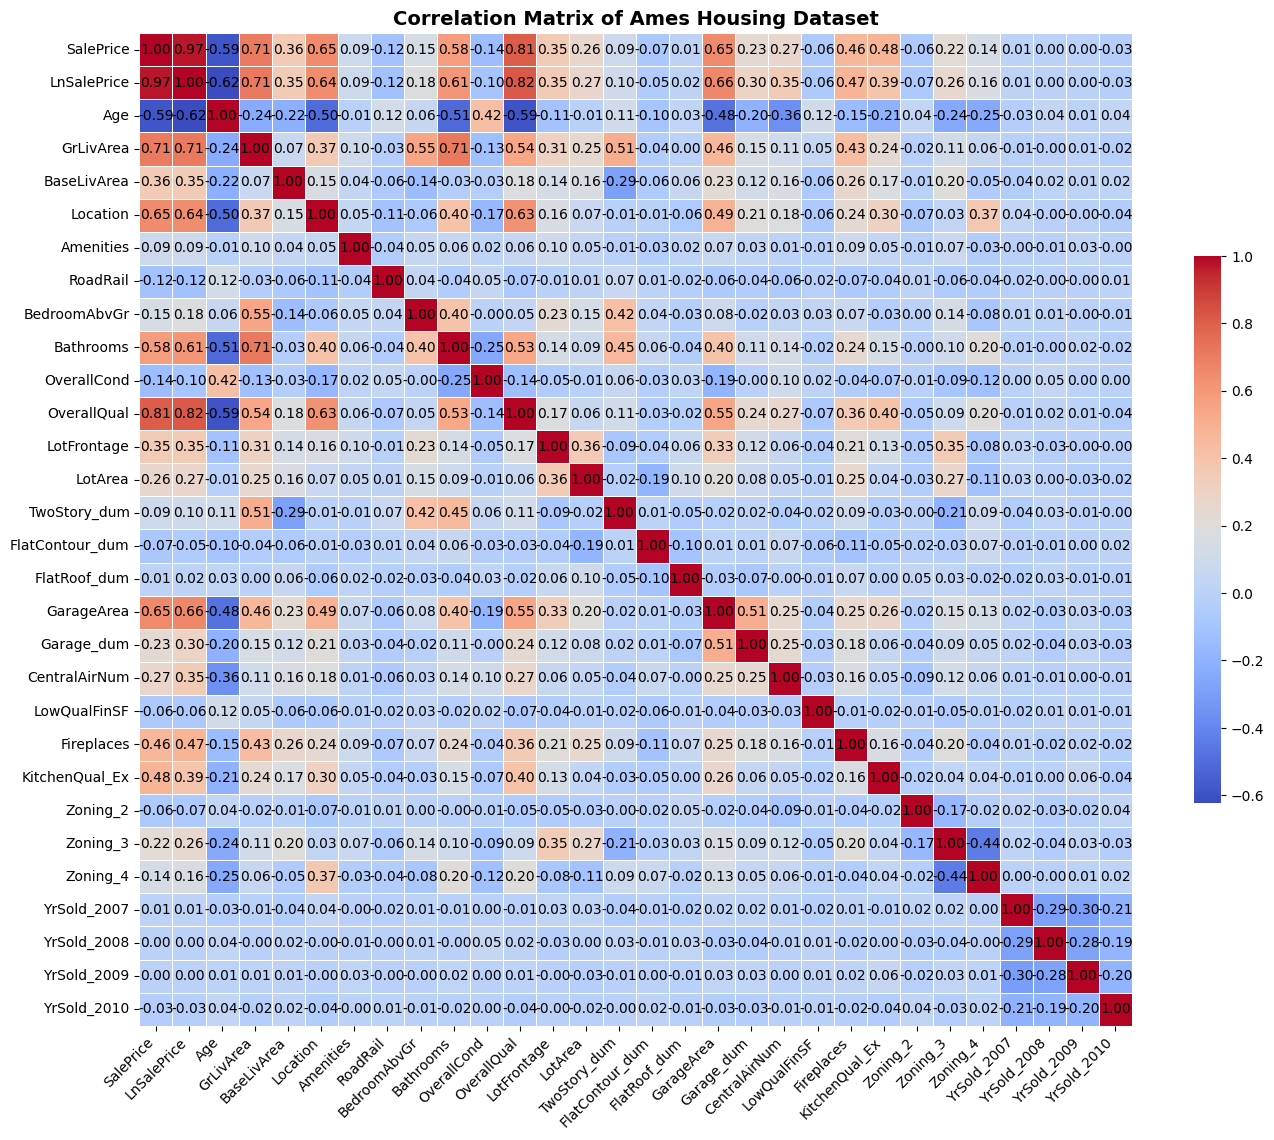

In [91]:

# Calculate the correlation matrix
corr_matrix = df.corr()
#Correlation matrix
plt.figure(figsize=(14, 12))  # Increase the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, yticklabels=True,
            annot_kws={"size": 10, "color": "black"}, square=True, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right')  # Align x-axis labels to the right for better spacing
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Correlation Matrix of Ames Housing Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [92]:
#E Hypothesis Testing

In [93]:
#ANOVA Test for Hypothesis 1:
#Null Hypothesis (H0): There is no significant difference in Sale Prices between houses with different 'OverallQual' ratings.
#Alternative Hypothesis (H1): Sale Prices vary significantly depending on the 'OverallQual' ratings of houses.

import pandas as pd
from scipy.stats import f_oneway



# Perform ANOVA
anova_result = f_oneway(*[df['SalePrice'][df['OverallQual'] == qual] for qual in df['OverallQual'].unique()])

# Print ANOVA result
print('ANOVA Result:')
print('F-value:', anova_result.statistic)
print('p-value:', anova_result.pvalue)



ANOVA Result:
F-value: 659.6811422367683
p-value: 0.0


In [94]:
#Since the p-value is essentially zero (less than 0.05), you reject the null hypothesis. 
#This means you have strong statistical evidence to support the alternative hypothesis that 
#Sale Prices vary significantly based on 'OverallQual' ratings.

In [95]:
#Chi-square Test for Hypothesis 2:
#Null Hypothesis (H0): There is no association between the 'CentralAirNum' and 'SalePrice' categories.
#Alternative Hypothesis (H1): There is an association between Central Air Conditioning and Sale Prices.

from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(df['CentralAirNum'], df['SalePrice'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
p_value_normal = np.format_float_positional(p)


# Print Chi-square test result
print('\nChi-square Test Result:')
print('Chi-square value:', chi2)
print('p-value:', p_value_normal)



Chi-square Test Result:
Chi-square value: 1338.529709237924
p-value: 0.000000000000000019179942881163022


In [96]:
#Since the p-value is practically zero (much less than 0.05), you reject the null hypothesis. 
#This implies that you have strong statistical evidence to support the alternative hypothesis 
#that there is an association between Central Air Conditioning and Sale Prices.

In [97]:
#F Advanced Analysis

In [98]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler



In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SalePrice        2617 non-null   float64
 1   LnSalePrice      2617 non-null   float64
 2   Age              2617 non-null   float64
 3   GrLivArea        2617 non-null   float64
 4   BaseLivArea      2617 non-null   float64
 5   Location         2617 non-null   int64  
 6   Amenities        2617 non-null   int64  
 7   RoadRail         2617 non-null   int64  
 8   BedroomAbvGr     2617 non-null   float64
 9   Bathrooms        2617 non-null   float64
 10  OverallCond      2617 non-null   float64
 11  OverallQual      2617 non-null   float64
 12  LotFrontage      2617 non-null   float64
 13  LotArea          2617 non-null   float64
 14  TwoStory_dum     2617 non-null   int64  
 15  FlatContour_dum  2617 non-null   int64  
 16  FlatRoof_dum     2617 non-null   int64  
 17  GarageArea    

In [100]:
# Deleting the single null value in 'GarageArea'
df = df[~df['GarageArea'].isnull()]
print(df)

      SalePrice  LnSalePrice   Age  GrLivArea  BaseLivArea  Location  \
0      215000.0    12.278393  50.0     1656.0        639.0         2   
1      105000.0    11.561716  49.0      896.0        612.0         2   
2      172000.0    12.055250  52.0     1329.0        923.0         2   
3      244000.0    12.404924  42.0     2110.0       1065.0         2   
4      189900.0    12.154253  13.0     1629.0        791.0         2   
...         ...          ...   ...        ...          ...       ...   
2612   142500.0    11.867097  22.0     1003.0        819.0         2   
2613   131000.0    11.782953  23.0      902.0        625.0         2   
2614   132000.0    11.790557  14.0      970.0        337.0         2   
2615   170000.0    12.043554  32.0     1389.0       1194.0         2   
2616   188000.0    12.144197  13.0     2000.0        758.0         2   

      Amenities  RoadRail  BedroomAbvGr  Bathrooms  ...  LowQualFinSF  \
0             0         0           3.0        1.0  ...       

In [101]:
df.isnull().values.any()

np.False_

In [102]:
df = df.drop(['Bathrooms'], axis=1)

In [103]:
df_0609 = df.loc[df['YrSold_2010'] != 1]
df_0609.shape

(2307, 29)

In [104]:
# Assigning 2010 data as the holdout test set
df_2010 = df.loc[df['YrSold_2010'] == 1]

In [105]:
y_SP = df_0609['SalePrice']
y_lnSP = df_0609['LnSalePrice']

In [106]:
X = df_0609.drop(['SalePrice', 'LnSalePrice'], axis=1)

In [107]:
X.shape

(2307, 27)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size=0.3, random_state=8)

In [109]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [110]:
#Linear Regression model for sale price prediction
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [111]:
# Predict on the test set

y_pred = linear_regression_model.predict(X_test)


In [112]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [113]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.07703466855469435
Mean Squared Error (MSE): 0.011182778443829373
Root Mean Squared Error (RMSE): 0.10574865693629103


In [114]:
#Polynomial 2nd degree model for sale price prediction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have already split your data into train_x, train_y, test_x, test_y
train_x, test_x, train_y, test_y = train_test_split(X, y_lnSP, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

# Train the polynomial regression model
model = LinearRegression()
model.fit(train_x_poly, train_y)

# Make predictions
train_y_pred = model.predict(train_x_poly)
test_y_pred = model.predict(test_x_poly)

# Calculate metrics
train_mae = mean_absolute_error(train_y, train_y_pred)
test_mae = mean_absolute_error(test_y, test_y_pred)

train_mse = mean_squared_error(train_y, train_y_pred)
test_mse = mean_squared_error(test_y, test_y_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)



print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)


Test MAE: 0.08847571350260497
Test MSE: 0.056523796572756024
Test RMSE: 0.23774733767753536
